
# Week 1 — Forest Fires EDA
**Name:** Ardhaya Johari  
**Objective:** Load the forest fires dataset and perform initial exploration (.info, .describe(), .isnull().sum()).  

**Observations:**
- The dataset has 517 rows and 13 columns.  
- Columns include both numeric (FFMC, DMC, DC, ISI, temp, RH, wind, rain, area) and categorical (month, day).  
- No missing values were found.  
- Numeric features vary in scale; area is highly skewed (mostly 0).  
- Categorical features are in text form and represent time.  


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported")


Libraries imported


In [4]:

import os
print("forestfires.csv exists:", os.path.exists("forestfires.csv"))


forestfires.csv exists: True


In [5]:

df = pd.read_csv("forestfires.csv")
print("Loaded. Shape:", df.shape)
df.head()


Loaded. Shape: (517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [7]:

df.describe(include='all')


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.669246,4.299807,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000


In [8]:

df.isnull().sum()


X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


# Week 2 — Forest Fire Analysis: EDA, Transformation & Feature Selection

**Name:** Ardhaya Johari  
**Dataset:** `forestfires.csv` (517 rows × 13 columns)

This section continues Week 1 and adds:
1) Visual EDA, 2) Data transformation (log), and 3) Basic feature selection.



In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

plt.rcParams['figure.figsize'] = (7, 4)
pd.set_option('display.max_columns', None)

print("Libraries imported for Week 2.")


Libraries imported for Week 2.


## 1) Load data

In [10]:

print("Current shape:", df.shape)
df.head()


Current shape: (517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## 2) Target variable (`area`) distribution

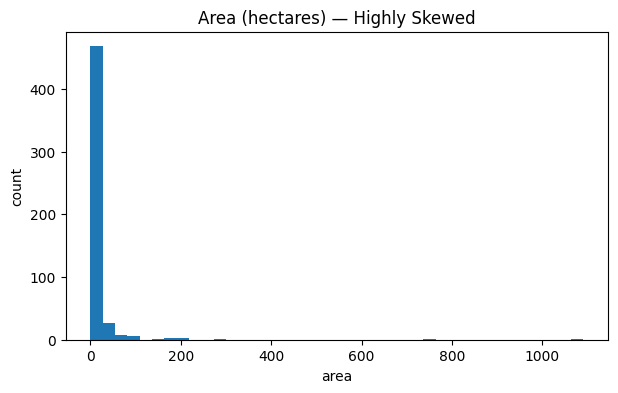

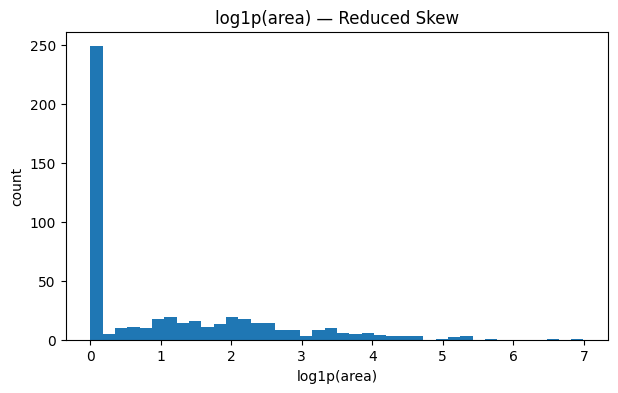

,area,area_log
count,517.000000,517.000000
mean,12.847292,1.111026
std,63.655818,1.398436
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.520000,0.418710
75%,6.570000,2.024193
max,1090.840000,6.995620


In [11]:

fig = plt.figure()
plt.hist(df['area'], bins=40)
plt.title("Area (hectares) — Highly Skewed")
plt.xlabel("area")
plt.ylabel("count")
plt.show()

df['area_log'] = np.log1p(df['area'])

fig = plt.figure()
plt.hist(df['area_log'], bins=40)
plt.title("log1p(area) — Reduced Skew")
plt.xlabel("log1p(area)")
plt.ylabel("count")
plt.show()

df[['area', 'area_log']].describe()



**observation:**  
- The area distribution is extremely right-skewed, with most fire areas equal to 0.
- After applying log1p(area), the distribution becomes more balanced, making it easier to analyze and model.



## 3) Categorical features (`month`, `day`)

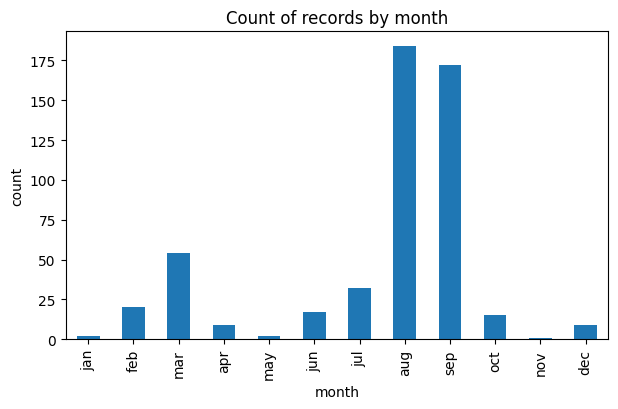

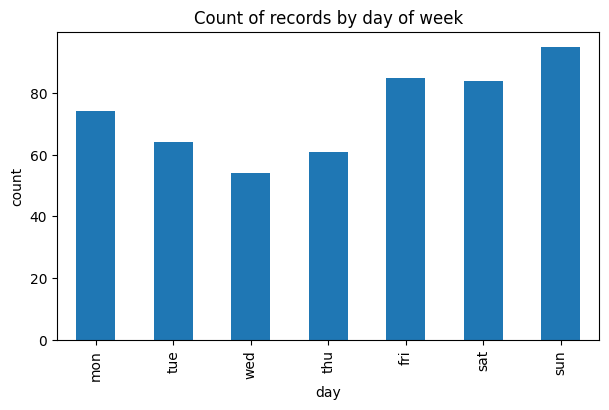

C:\Users\ardhaya johari\AppData\Local\Temp\ipykernel_8396\2566222514.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('month')['area_log'].mean().plot(kind='bar')


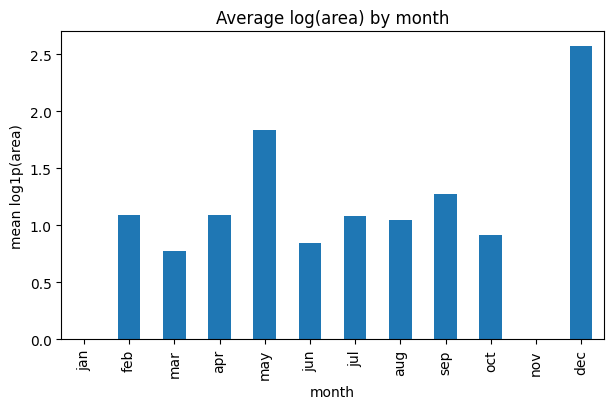

C:\Users\ardhaya johari\AppData\Local\Temp\ipykernel_8396\2566222514.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['area_log'].mean().reindex(day_order).plot(kind='bar')


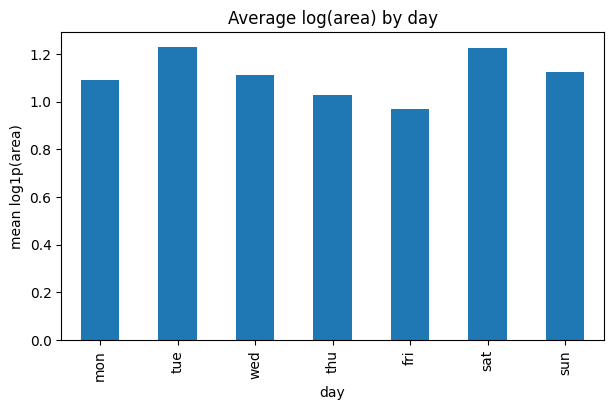

In [12]:

month_order = ["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
day_order = ["mon","tue","wed","thu","fri","sat","sun"]

df['month'] = df['month'].str.lower()
df['day'] = df['day'].str.lower()

df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
df['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)

fig = plt.figure()
df['month'].value_counts().sort_index().plot(kind='bar')
plt.title("Count of records by month")
plt.xlabel("month")
plt.ylabel("count")
plt.show()

fig = plt.figure()
df['day'].value_counts().reindex(day_order).plot(kind='bar')
plt.title("Count of records by day of week")
plt.xlabel("day")
plt.ylabel("count")
plt.show()

fig = plt.figure()
df.groupby('month')['area_log'].mean().plot(kind='bar')
plt.title("Average log(area) by month")
plt.xlabel("month")
plt.ylabel("mean log1p(area)")
plt.show()

fig = plt.figure()
df.groupby('day')['area_log'].mean().reindex(day_order).plot(kind='bar')
plt.title("Average log(area) by day")
plt.xlabel("day")
plt.ylabel("mean log1p(area)")
plt.show()



**observation:**  
- Fire records are concentrated in the summer months (July–September), with August showing the highest average burned area.
- Weekdays and weekends show similar distributions, but some midweek days (like Friday) tend to have slightly higher mean fire sizes.



## 4) Numerical feature relationships

In [13]:

num_cols = ['FFMC','DMC','DC','ISI','temp','RH','wind','rain','X','Y','area_log']

corr = df[num_cols].corr(numeric_only=True)
corr['area_log'].sort_values(ascending=False)


area_log    1.000000
DMC         0.067153
wind        0.066973
DC          0.066360
X           0.061995
temp        0.053487
FFMC        0.046799
Y           0.038838
rain        0.023311
ISI        -0.010347
RH         -0.053662
Name: area_log, dtype: float64

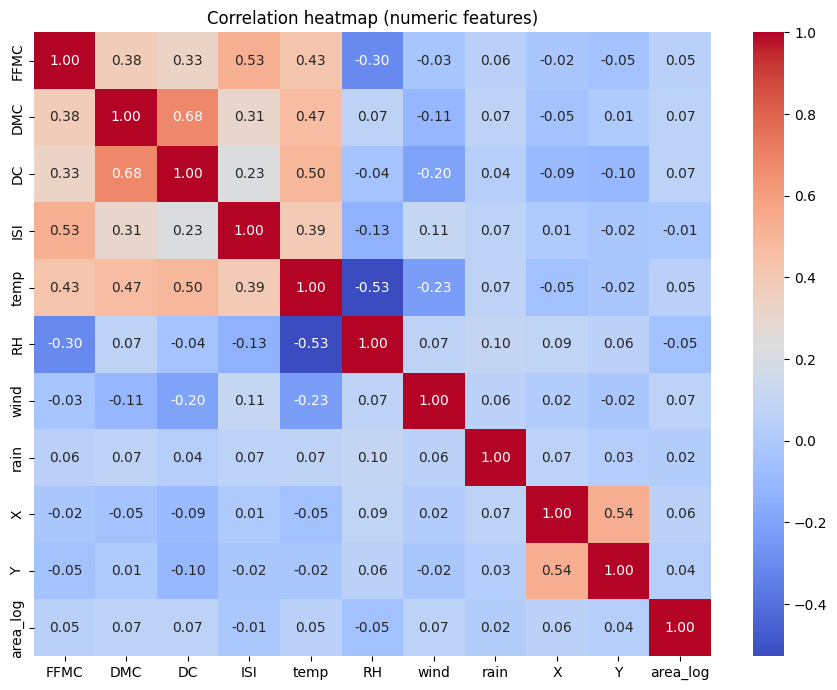

In [14]:

fig = plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation heatmap (numeric features)")
plt.tight_layout()
plt.show()


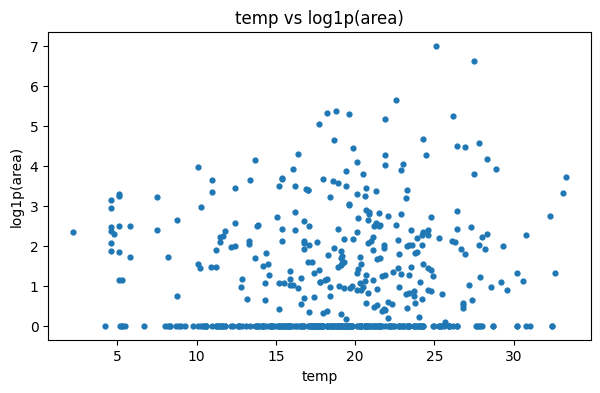

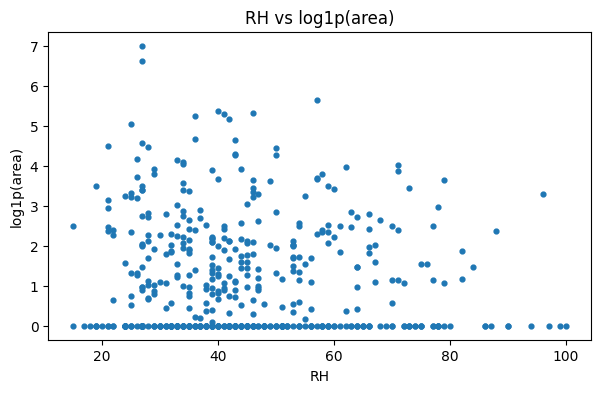

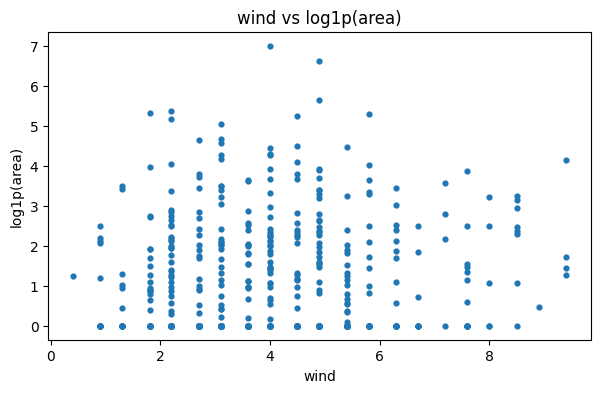

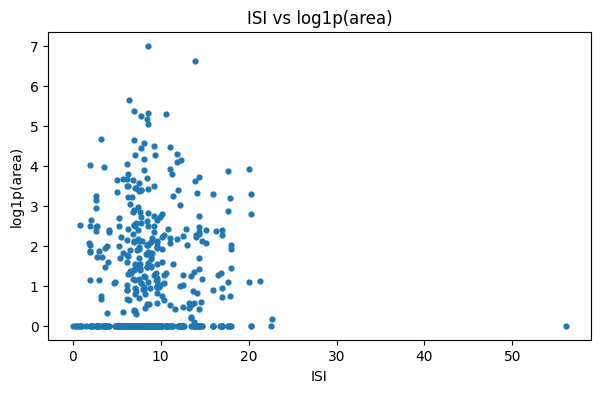

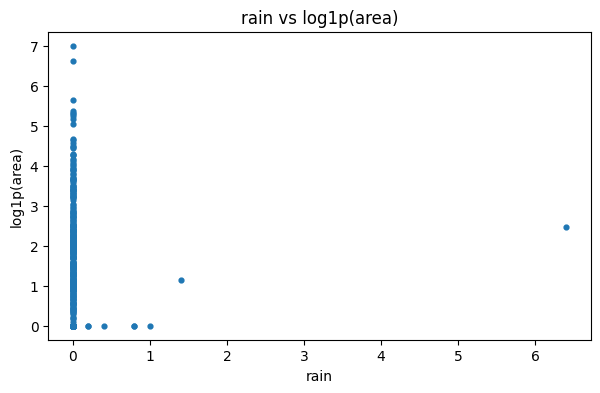

In [15]:

for col in ['temp','RH','wind','ISI','rain']:
    fig = plt.figure()
    plt.scatter(df[col], df['area_log'], s=12)
    plt.title(f"{col} vs log1p(area)")
    plt.xlabel(col)
    plt.ylabel("log1p(area)")
    plt.show()



**observation:**  
- Temperature has a weak positive relationship with burned area, meaning higher temperatures slightly increase the fire size.
- Relative humidity shows a weak negative relationship, indicating drier conditions can lead to larger fires.

- Wind and rain do not display strong correlations with fire size, suggesting limited direct impact. 



## 5) Spatial distribution (`X`, `Y`)

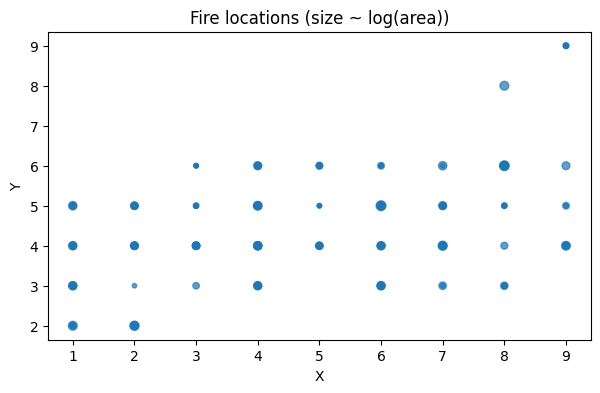

In [16]:

sizes = 10 + 40 * (df['area_log'] - df['area_log'].min()) / (df['area_log'].max() - df['area_log'].min())

fig = plt.figure()
plt.scatter(df['X'], df['Y'], s=sizes, alpha=0.7)
plt.title("Fire locations (size ~ log(area))")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



**observation:**  
- Larger fires are scattered but tend to appear more frequently in the central and eastern regions of the grid.
- No single X–Y location dominates, but clusters of larger fires are noticeable in a few zones.


## 6) Outliers in `area` / `area_log`

In [17]:

top10 = df.nlargest(10, 'area')[['X','Y','month','day','temp','RH','wind','rain','ISI','area','area_log']]
top10


,X,Y,month,day,temp,RH,wind,rain,ISI,area,area_log
238,6,5,sep,sat,25.1,27,4.0,0.0,8.6,1090.84,6.995620
415,8,6,aug,thu,27.5,27,4.9,0.0,13.9,746.28,6.616440
479,7,4,jul,mon,22.6,57,4.9,0.0,6.4,278.53,5.633110
237,1,2,sep,tue,18.8,40,2.2,0.0,7.0,212.88,5.365415
236,2,2,sep,sat,18.2,46,1.8,0.0,8.6,200.94,5.307971
235,8,6,aug,sun,19.6,41,5.8,0.0,10.6,196.48,5.285637
420,8,8,aug,wed,26.2,36,4.5,0.0,7.8,185.76,5.229824
377,2,2,aug,sat,21.9,42,2.2,0.0,8.4,174.63,5.168380
234,4,5,sep,sat,17.7,25,3.1,0.0,8.6,154.88,5.049086
233,9,4,sep,tue,24.3,36,3.1,0.0,3.2,105.66,4.669646


In [18]:

q1, q3 = df['area_log'].quantile([0.25, 0.75])
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

outliers = df[(df['area_log'] > upper) | (df['area_log'] < lower)]
print("Outliers count:", outliers.shape[0])
outliers[['area','area_log']].describe()


Outliers count: 8


,area,area_log
count,8.00000,8.000000
mean,385.79250,5.700300
std,342.89929,0.703459
min,174.63000,5.168380
25%,193.80000,5.271684
50%,206.91000,5.336693
75%,395.46750,5.878942
max,1090.84000,6.995620



**observation:**  
- A few very large fires act as outliers and dominate the burned area distribution.
- These outliers may strongly influence averages and should be carefully considered in analysis or modeling.



## 7) Simple feature selection

In [19]:

target = 'area_log'
numeric_features = ['FFMC','DMC','DC','ISI','temp','RH','wind','rain','X','Y']
categorical_features = ['month','day']

X_num = df[numeric_features].copy()
X_cat = df[categorical_features].astype('category')

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat_ohe = ohe.fit_transform(X_cat)
ohe_cols = ohe.get_feature_names_out(categorical_features)

X = pd.concat([X_num.reset_index(drop=True), pd.DataFrame(X_cat_ohe, columns=ohe_cols)], axis=1)
y = df[target].values

print("Feature matrix shape:", X.shape)
X.head()


Feature matrix shape: (517, 29)


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,X,Y,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,7,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,7,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,7,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,8,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,8,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:

mi = mutual_info_regression(X, y, random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
mi_series.head(20)


ISI          0.086566
temp         0.081604
DMC          0.078192
DC           0.060611
month_dec    0.040909
month_aug    0.038662
month_jun    0.028568
month_mar    0.026782
month_sep    0.026718
RH           0.021428
wind         0.018247
FFMC         0.010114
month_may    0.009014
month_oct    0.008938
month_jul    0.003394
day_mon      0.001550
day_wed      0.001108
Y            0.000000
month_apr    0.000000
rain         0.000000
dtype: float64

In [21]:

corr_y = pd.concat([X_num, pd.Series(y, name='area_log')], axis=1).corr(numeric_only=True)['area_log'].drop('area_log').sort_values(ascending=False)
corr_y


DMC     0.067153
wind    0.066973
DC      0.066360
X       0.061995
temp    0.053487
FFMC    0.046799
Y       0.038838
rain    0.023311
ISI    -0.010347
RH     -0.053662
Name: area_log, dtype: float64


**Your observation:**
- Mutual Information ranking highlights variables such as ISI, DC, DMC, temp, and RH as being most useful in predicting burned area.
- Correlation confirms that temperature has a positive relationship and relative humidity a negative relationship with burned area.


## 8)Baseline Regression check

In [22]:

from sklearn.model_selection import cross_val_score, KFold

top_k = 12
top_feats = mi_series.head(top_k).index.tolist()
X_top = X[top_feats]

model = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_top, y, scoring='r2', cv=cv)
print("Linear Regression (top", top_k, "MI features) 5-fold R^2:", scores)
print("Mean R^2:", scores.mean())


Linear Regression (top 12 MI features) 5-fold R^2: [ 0.04657789  0.04093504  0.01589042  0.01675346 -0.0395992 ]
Mean R^2: 0.016111522643334063



**observation:**  
- The Linear Regression R² scores are low, meaning the dataset is noisy and relationships are weakly linear.
- This suggests that more advanced or nonlinear models may be required for better prediction.


In [3]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load dataset
df = pd.read_csv("forestfires.csv")

# Create binary target (1 if area > 0, else 0)
df['fire'] = df['area'].apply(lambda x: 1 if x > 0 else 0)

# Select only numeric features
features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
X = df[features]
y = df['fire']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline and train model
clf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

clf_pipeline.fit(X_train, y_train)

# Evaluate
y_pred = clf_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save model
joblib.dump(clf_pipeline, 'models/rf_clf_pipeline.joblib')
print("Model saved successfully!")

# Features including month/day
features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'month', 'day']
X = df[features]

# One-hot encode month/day
X = pd.get_dummies(X, columns=['month','day'], drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline remains the same
clf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train
clf_pipeline.fit(X_train, y_train)

# Evaluate
y_pred = clf_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Save model and columns
joblib.dump(clf_pipeline, 'models/rf_clf_pipeline.joblib')
joblib.dump(X_train.columns.tolist(), 'models/model_columns.joblib')
print("Model and feature columns saved successfully!")


Accuracy: 0.5480769230769231
              precision    recall  f1-score   support

           0       0.55      0.47      0.51        51
           1       0.55      0.62      0.58        53

    accuracy                           0.55       104
   macro avg       0.55      0.55      0.54       104
weighted avg       0.55      0.55      0.55       104

Model saved successfully!
Accuracy: 0.5096153846153846
Model and feature columns saved successfully!
